In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [105]:
insurance=pd.read_csv("/content/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Outlier Detection

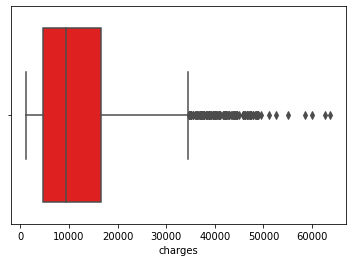

In [106]:
sns.boxplot(x=insurance['charges'],orient="h",color="red")

In [107]:
Q1=insurance['charges'].quantile(0.25)
Q3=insurance['charges'].quantile(0.75)

iqr=Q3-Q1
print(iqr)

11899.625365


In [108]:
upper_limit=Q3+1.5*iqr

In [109]:
lower_limit=Q3-1.5*iqr

In [110]:
print(upper_limit,lower_limit)

34489.350562499996 -1209.5255324999998


In [111]:
insurance[insurance["charges"]>upper_limit]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


In [112]:
insurance[insurance["charges"]<lower_limit]

,age,sex,bmi,children,smoker,region,charges


Removing outlier -- but this is not a good technique because in this we will remove a lot of data points.

So we will do one thing -- 
  
the values which are present above the upper_limit is assigned a value of upper_limit and value with less than lower_limit value will be assigned lower_limit value

In [113]:
data_without_outlier=insurance[(insurance.charges<=upper_limit)&(insurance.charges>=lower_limit)]
data_without_outlier.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Outlier capping - 

It is a process in which the values which are present above the upper_limit is assigned a value of upper_limit and value with less than lower_limit value will be assigned lower_limit value

In [114]:
#we will copy the data to a new variable
new_insurance_data=insurance.copy()

# now we will do capping
new_insurance_data['charges']=np.where(new_insurance_data['charges']>upper_limit,upper_limit,np.where(new_insurance_data['charges']<lower_limit,lower_limit,new_insurance_data['charges']))

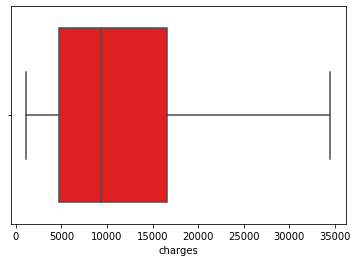

In [143]:
sns.boxplot(x=new_insurance_data['charges'],orient="h",color="red")

Now in the above scatter plot all the points are in the range and no outliers are present .............. we achieve this with the help of outlier capping

In [116]:
new_insurance_data.replace({"sex":{'female':0,'male':1}},inplace=True)

In [117]:
new_insurance_data.replace({"region":{'southwest':0,'southeast':1,'northwest':2,'northeast':3}},inplace=True)

In [118]:
new_insurance_data.replace({'smoker':{'yes':1,'no':0}},inplace=True)

In [119]:
X=new_insurance_data.drop(columns='charges',axis=1)
Y=new_insurance_data['charges']

In [120]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=2)

In [121]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [122]:
X_train

,age,sex,bmi,children,smoker,region
882,21,0,22.135,0,0,3
505,37,1,30.875,3,0,2
798,58,0,33.100,0,0,0
792,22,0,23.180,0,0,3
201,48,0,32.230,1,0,1
...,...,...,...,...,...,...
466,60,0,28.700,1,0,0
299,48,0,28.880,1,0,2
493,61,1,43.400,0,0,0
527,51,0,25.800,1,0,0


In [123]:
X_test

,age,sex,bmi,children,smoker,region
17,23,1,23.845,0,0,3
1091,55,0,29.830,0,0,3
273,50,1,27.455,1,0,3
270,18,1,29.370,1,0,1
874,44,1,21.850,3,0,3
...,...,...,...,...,...,...
232,19,0,17.800,0,0,0
323,57,1,40.945,0,0,3
1337,61,0,29.070,0,1,2
1066,48,1,37.290,2,0,1


In [124]:
Y_train

882      2585.85065
505      6796.86325
798     11848.14100
792      2731.91220
201      8871.15170
           ...     
466     13224.69300
299      9249.49520
493     12574.04900
527      9861.02500
1192    13019.16105
Name: charges, Length: 1070, dtype: float64

In [125]:
Y_test.head(10)

17       2395.17155
1091    11286.53870
273      9617.66245
270      1719.43630
874      8891.13950
790      5662.22500
957     12609.88702
492      2196.47320
1125    14254.60820
794      7209.49180
Name: charges, dtype: float64

In [126]:
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [127]:
training_data_prediction=regressor.predict(X_train)

In [128]:
r2_train=r2_score(Y_train,training_data_prediction)
print("The accuracy of given model is",r2_train)

The accuracy of given model is 0.7451746506684007


In [129]:
test_data_prediction=regressor.predict(X_test)
r2_test_value=r2_score(Y_test,test_data_prediction)
print(r2_test_value)

0.755415817502485


In [130]:
input_data=(19,0,27.900,0,1,0)

In [131]:
#changing input_data which is tuple into numpy array 
data=np.array(input_data)

In [132]:
#reshape the array
input_data_reshape=data.reshape(1,-1)

prediction=regressor.predict(input_data_reshape)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [133]:
print("The insurance cost is :",prediction[0])

The insurance cost is : 22450.940044066832


In [134]:
prediction[0]-16889.92400

5561.016044066833

In [135]:
new_insurance_data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.002127,0.313394
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.004588,0.052322
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.157566,0.160175
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.016569,0.073074
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.002181,0.785958
region,-0.002127,-0.004588,-0.157566,-0.016569,0.002181,1.000000,0.016890
charges,0.313394,0.052322,0.160175,0.073074,0.785958,0.016890,1.000000


In [136]:
X1=new_insurance_data[['smoker','age','bmi']]
X1

,smoker,age,bmi
0,1,19,27.900
1,0,18,33.770
2,0,28,33.000
3,0,33,22.705
4,0,32,28.880
...,...,...,...
1333,0,50,30.970
1334,0,18,31.920
1335,0,18,36.850
1336,0,21,25.800


In [137]:
Y1=new_insurance_data['charges']

In [138]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.2,random_state=3)

In [139]:
#loading the linear regression model
regressor1=LinearRegression()
regressor1.fit(X1_train,Y1_train)

LinearRegression()

In [140]:
#predication of Y_train values
training_data_prediction1=regressor1.predict(X1_train)

In [141]:
#R^2 value for accuracy
r2_train1=r2_score(Y1_train,training_data_prediction1)
print("The accuracy of given model is",r2_train1)

The accuracy of given model is 0.7451233450574786


In [142]:
test_data_prediction=regressor.predict(X_test)
r2_test_value=r2_score(Y_test,test_data_prediction)
print(r2_test_value)

0.755415817502485
